In [1]:
# dataset: letterdata.csv
# Location: https://mitu.co.in/dataset

In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('letterdata.csv')
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
df.shape

(20000, 17)

In [6]:
x = df.drop('letter', axis = 1)
y = df['letter']

In [8]:
import warnings
warnings.filterwarnings('ignore')

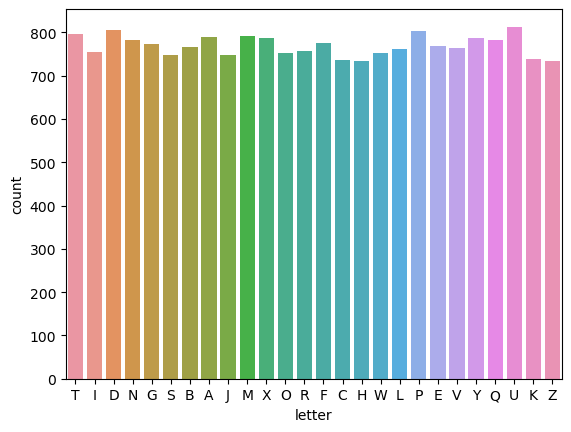

In [9]:
import seaborn as sns

sns.countplot(x = y);

In [12]:
y.value_counts()

letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64

In [14]:
# scaling

from sklearn.preprocessing import StandardScaler
sca = StandardScaler()
x_scaled = sca.fit_transform(x)

In [15]:
# encoding

y_one_hot = pd.get_dummies(y)

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_one_hot,
                                                   random_state= 12,
                                                   test_size= 0.20)

### build the model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()

In [19]:
model.add(Dense(128, activation= 'relu', 
          input_shape = (x_train.shape[1],)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(len(np.unique(y)), activation= 'softmax'))

In [20]:
# compile the model
model.compile(optimizer= 'adam', 
              loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [21]:
model.fit(x_train, y_train, epochs = 10, batch_size = 32,
         verbose = 1)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4407 - loss: 2.1215
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8007 - loss: 0.7107
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8526 - loss: 0.5067
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8810 - loss: 0.4041
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8996 - loss: 0.3413
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9157 - loss: 0.2828
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9287 - loss: 0.2440
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9347 - loss: 0.2158
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9379 - loss: 0.2074
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9429 - loss: 0.1806


In [22]:
loss, accuracy = model.evaluate(x_test, y_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.9347 - loss: 0.2079


In [24]:
print('Loss', loss)
print('Accuracy', accuracy)

Loss 0.20865045487880707
Accuracy 0.9334999918937683
